# Image Formation and Features
### CS655000 Computer Vision Homework 1
### Brief
* Due: Wed, 10/16, 23:59
* Use Python to complete the homework.
* If you encounter any problem, let’s discuss on iLMS instead of email.

## Part 1. Harris Corner Detection

With the Harris corner detector described in slides (p.79), mark the detected corners on the image.

<img style="float: left;" src="1.PNG" width="60%">

### A. Functions:
* `gaussian_smooth()`: filter images with Gaussian blur.
* `sobel_edge_detection()`: apply the Sobel filters to the blurred images and compute the magnitude and direction of gradient. (You should eliminate weak gradients by proper threshold.)
* `structure_tensor()`: use the gradient magnitude above to compute the structure tensor (second-moment matrix).
* `nms()`: perform non-maximal suppression on the results above along with appropriate threshold for corner detection.

### B. Results:
* a. Original image
    * i. Gaussian smooth results: 𝜎=5 and kernel size=5 and 10 (**2 images**)
    * ii. Sobel edge detection results
     * (1) magnitude of gradient (Gaussian kernel size=5 and 10) (**2 images**)
     * (2) direction of gradient (Gaussian kernel size=5 and 10) (**2 images**)
        (You can choose arbitrary color map to display)
    * iii. Structure tensor + NMS results (Gaussian kernel size=10)
     * (1) window size = 3x3 (**1 image**)
     * (2) window size = 30x30 (**1 image**)
* b. Final results of rotating (by 30°) original images (**1 image**)
* c. Final results of scaling (to 0.5x) original images (**1 image**)

### C. Report:
* a. Discuss the results of blurred images and detected edges between different kernel sizes of Gaussian filter.
* b. Discuss the difference between 3x3 and 30x30 window sizes of structure tensor.
* c. Discuss the effect of non-maximal suppression.
* d. Discuss the results of rotated and scaled image. Is Harris detector rotation-invariant or scale-invariant? Explain the reason.

### D. Notice:
* a. You should **NOT** use any functions which can get the result directly in each steps. (`cv2.Sobel`, `cv2.Laplacian`, `cv2.cornerHarris`, `skimg.feature.local_binary_pattern`, etc.)
* b. Your code should display and output image results mentioned above.
* c. You should provide a README file about your execution instructions.

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

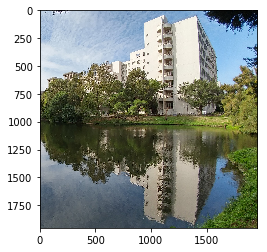

In [209]:
img = cv2.imread('original.jpg')
img_copy = np.copy(img)
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

In [210]:
img.shape

(1954, 1954, 3)

## A. Harris corner detection with original image
### i. Gaussian smooth results: 𝜎=5 and kernel size=5 and 10 (**2 images**)

Since the sum of the elements in the Gaussian kernel equals 1, the kernel should be normalized before the convolution.

In [211]:
def gaussian_smooth(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [212]:
img_Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [213]:
from scipy.ndimage.filters import convolve
img_filtered_K5 = convolve(img_Gray, gaussian_smooth(size=5,sigma=5))
img_filtered_K10 = convolve(img_Gray, gaussian_smooth(size=10,sigma=5))
img_filtered_K5 =  img_filtered_K5 / np.amax(img_filtered_K5) * 255
img_filtered_K10 =  img_filtered_K10 / np.amax(img_filtered_K10) * 255

Text(0.5,1,'gaussian blur of kernel size = 10')

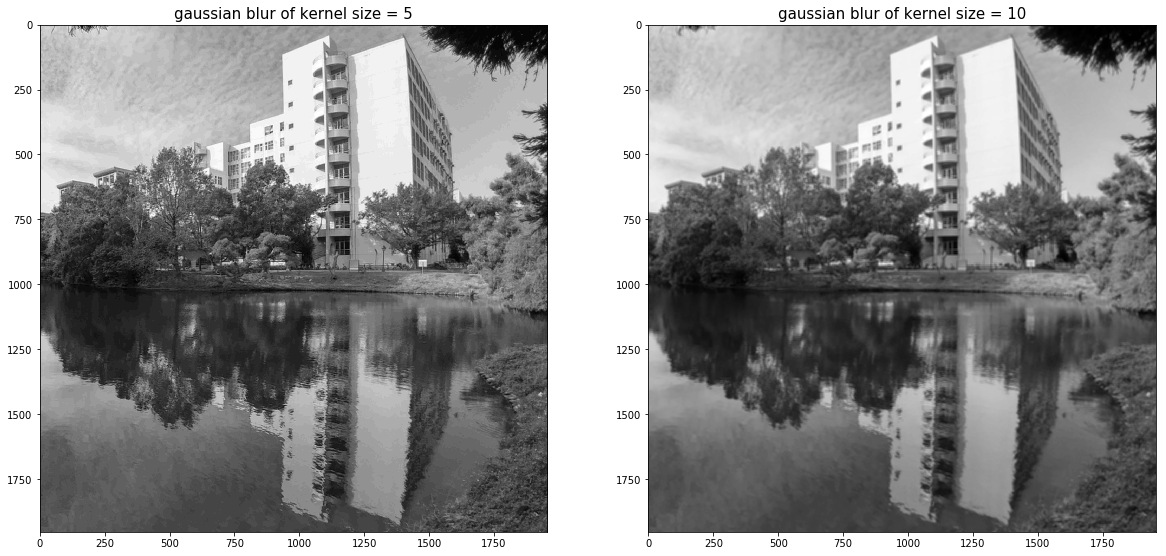

In [214]:
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img_filtered_K5)
plt.title('gaussian blur of kernel size = 5',fontsize=15)
plt.subplot(122),plt.imshow(img_filtered_K10)
plt.title('gaussian blur of kernel size = 10',fontsize=15)

### Question A: 
#### Discuss the results of blurred images and detected edges between different kernel sizes of Gaussian filter.
Based on the above image after Gaussian blur, we can see that the blurring effect depends on the kernel size. Basically, the largest the kernel, the more visible is the blur. In our example, we will use a 5 X 5 & 10 X10 Gaussian kernel. The above right image with kernel 10 X 10 is more blur than the left image with kernel 5 X 5.

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

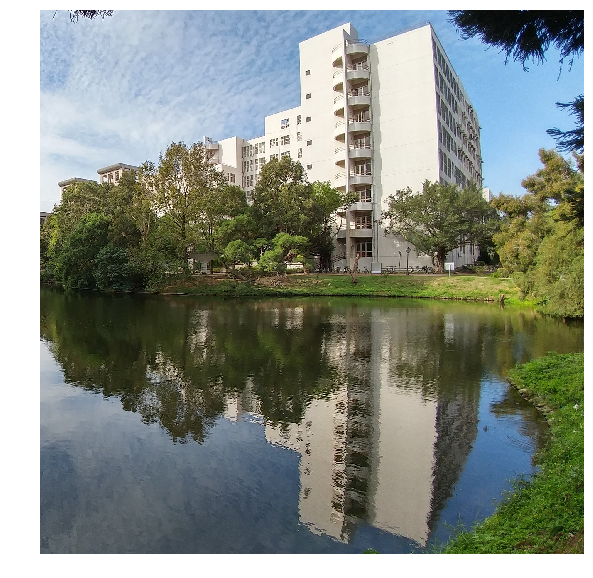

In [230]:
harrisim=structure_tensor(gradient_magnitude_K5, gradient_direction_K5, k=0.04)
NMS_W3=NMS(harrisim,window_size=3)
plt.figure(figsize=(20,10))
plot_harris_points(img_copy,NMS_W3)

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

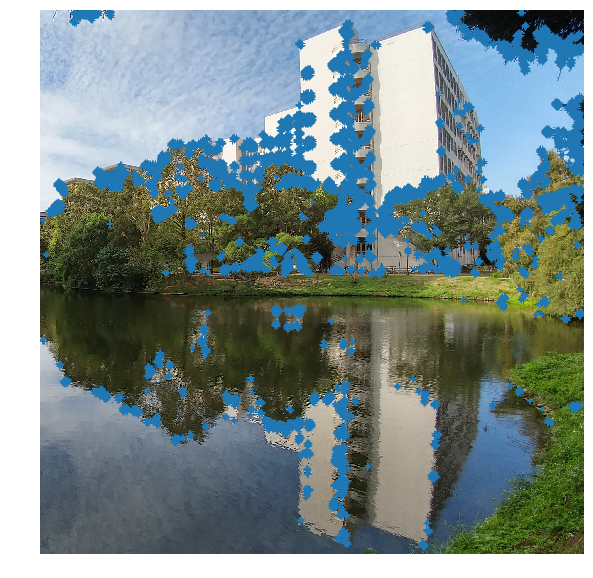

In [229]:
harrisim=structure_tensor(gradient_magnitude_K10, gradient_direction_K10, k=0.04)
NMS_W3=NMS(harrisim,window_size=3)
plt.figure(figsize=(20,10))
plot_harris_points(img_copy,NMS_W3)

### ii. Sobel edge detection results
#### (1) magnitude of gradient (Gaussian kernel size=5 and 10) (**2 images**)
#### (2) direction of gradient (Gaussian kernel size=5 and 10) (**2 images**)

the derivatives Ix and Iy w.r.t. x and y are calculated by convolving I with Sobel kernels Kx and Ky, respectively:

In [217]:
from scipy.ndimage import filters
sigma=5

def sobel_edge_detection(im):
    gradient_magnitude=np.zeros(im.shape)#计算导数
    filters.gaussian_filter(im,(sigma,sigma),(0,1),gradient_magnitude)
    gradient_direction=np.zeros(im.shape)
    filters.gaussian_filter(im,(sigma,sigma),(1,0),gradient_direction)
    return  (gradient_magnitude, gradient_direction)

In [218]:
gradient_magnitude_K5, gradient_direction_K5 = sobel_edge_detection(img_filtered_K5)
gradient_magnitude_K10, gradient_direction_K10 = sobel_edge_detection(img_filtered_K10)

In [219]:
gradient_magnitude_K5 =  gradient_magnitude_K5 / np.amax(gradient_magnitude_K5) * 255
gradient_magnitude_K10 =  gradient_magnitude_K10 / np.amax(gradient_magnitude_K10) * 255
gradient_direction_K5 =  gradient_direction_K5 / np.amax(gradient_direction_K5) * 255
gradient_direction_K10 =  gradient_direction_K10 / np.amax(gradient_direction_K10) * 255

Text(0.5,1,'gradient_magnitude_direction_kernel_size=10')

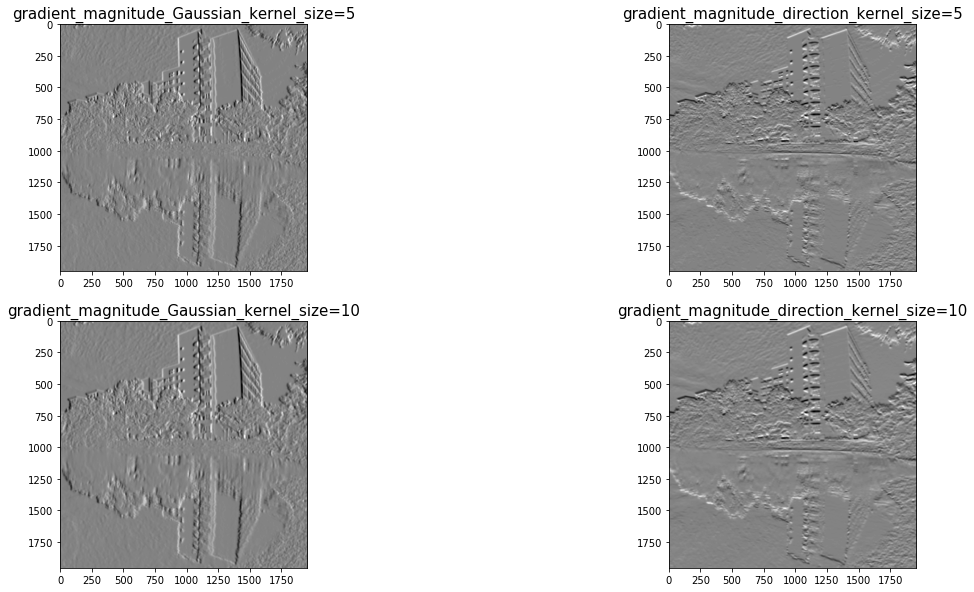

In [220]:
plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(gradient_magnitude_K5)
plt.title('gradient_magnitude_Gaussian_kernel_size=5',fontsize=15)
plt.subplot(222),plt.imshow(gradient_direction_K5)
plt.title('gradient_magnitude_direction_kernel_size=5',fontsize=15)
plt.subplot(223),plt.imshow(gradient_magnitude_K10)
plt.title('gradient_magnitude_Gaussian_kernel_size=10',fontsize=15)
plt.subplot(224),plt.imshow(gradient_direction_K10)
plt.title('gradient_magnitude_direction_kernel_size=10',fontsize=15)

Text(0.5,1,'gradient_magnitude_kernel_size=10')

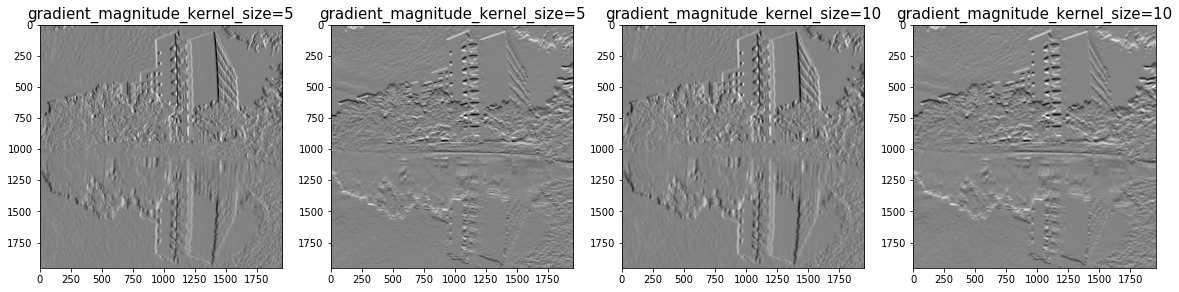

In [232]:
plt.figure(figsize=(20,10))
plt.subplot(141),plt.imshow(gradient_magnitude_K5)
plt.title('gradient_magnitude_kernel_size=5',fontsize=15)
plt.subplot(142),plt.imshow(gradient_direction_K5)
plt.title('gradient_magnitude_kernel_size=5',fontsize=15)
plt.subplot(143),plt.imshow(gradient_magnitude_K10)
plt.title('gradient_magnitude_kernel_size=10',fontsize=15)
plt.subplot(144),plt.imshow(gradient_direction_K10)
plt.title('gradient_magnitude_kernel_size=10',fontsize=15)

The result is almost the expected one, but we can see that some of the edges are thick and others are thin. Moreover, the gradient intensity level is between 0 and 255 which is not uniform. The edges on the final result should have the same intensity (i-e. white pixel = 255). **Non-Max Suppression (NMS)** step will help us mitigate the thick ones.

### Non-Maximum Suppression
Ideally, the final image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.
The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.

### iii. Structure tensor + NMS results (Gaussian kernel size=10)
#### (1) window size = 3x3 (**1 image**)
#### (2) window size = 30x30 (**1 image**)

In [221]:
def structure_tensor(gradient_magnitude, gradient_direction, k):
    Ixx=filters.gaussian_filter(gradient_magnitude*gradient_magnitude,sigma)   
    Ixy=filters.gaussian_filter(gradient_magnitude*gradient_direction,sigma)
    Iyy=filters.gaussian_filter(gradient_direction*gradient_direction,sigma)
    det = (Ixx * Iyy) - (Ixy **2)
    trace = Ixx + Iyy
    return  det/trace

In [222]:
def NMS(harrisim,window_size=30,threshold=0.1):
    conner_threshold=harrisim.max()*threshold
    harrisim_t=(harrisim>conner_threshold)*1
    coords=np.array(harrisim_t.nonzero()).T
    candidate_values=[harrisim[c[0],c[1]] for c in coords]
    index=np.argsort(candidate_values)
    allowed_locations=np.zeros(harrisim.shape)
    allowed_locations[window_size:-window_size,window_size:-window_size]=1
    filtered_coords=[]
    for i in index:
        if allowed_locations[coords[i,0],coords[i,1]]==1:
            filtered_coords.append(coords[i])
            allowed_locations[(coords[i,0]-window_size):(coords[i,0]+window_size),(coords[i,1]-window_size):(coords[i,1]+window_size)]=0
    return filtered_coords

In [223]:
def plot_harris_points(image,filtered_coords):
    plt.figure()
    plt.gray()
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.plot([p[1] for p in filtered_coords],[p[0]for p in filtered_coords],'+')
    plt.axis('off')
    plt.show()

In [224]:
harrisim=structure_tensor(gradient_magnitude_K10, gradient_direction_K10, k=0.04)
NMS_W3=NMS(harrisim,window_size=3)
NMS_W30=NMS(harrisim,window_size=30)

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

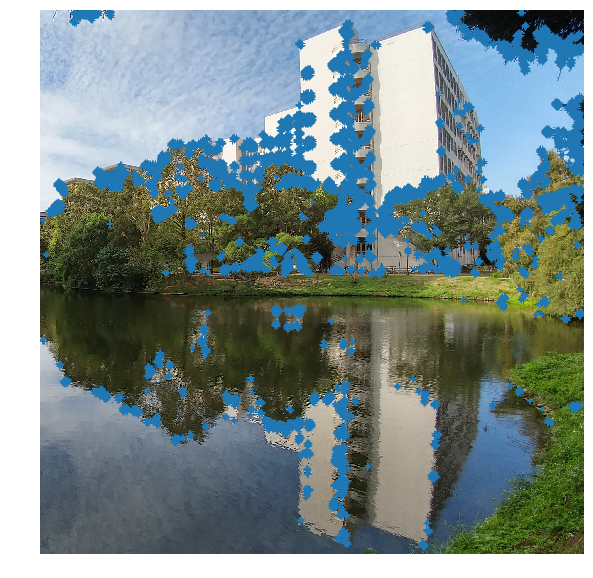

In [225]:
plt.figure(figsize=(20,10))
plot_harris_points(img_copy,NMS_W3)

<Figure size 432x288 with 0 Axes>

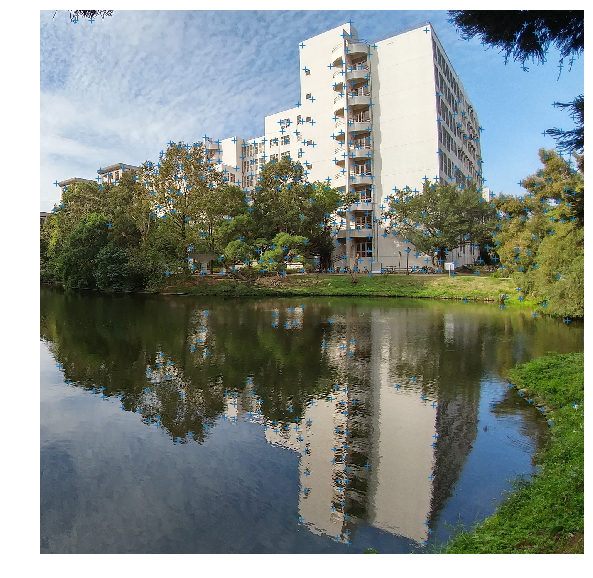

In [226]:
plot_harris_points(img_copy,NMS_W30)

### Compare with CV2.cornerHarris

In [184]:
import numpy as np
import cv2 as cv
filename = 'original.jpg'
imgCV2 = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)  
# Threshold for an optimal value, it may vary depending on the image.
imgCV2[dst>0.01*dst.max()]=[0,0,255]

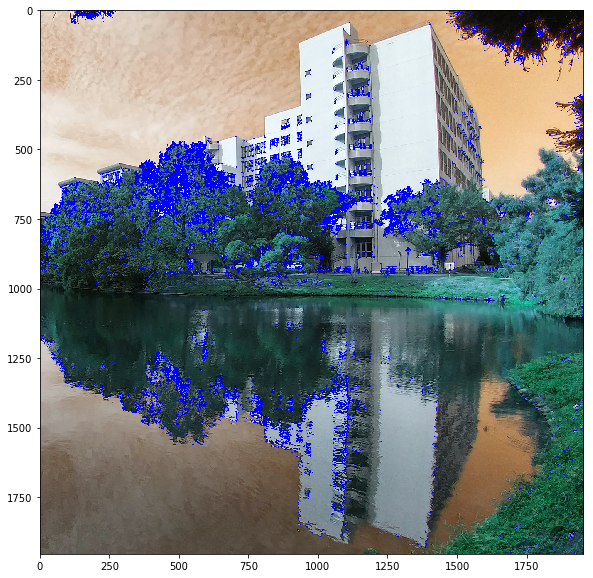

In [185]:
plt.figure(figsize=(20,10))
plt.imshow(imgCV2)

In [186]:
filename = 'original.jpg'
imgCV2 = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,29,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)  
# Threshold for an optimal value, it may vary depending on the image.
imgCV2[dst>0.01*dst.max()]=[0,0,255]

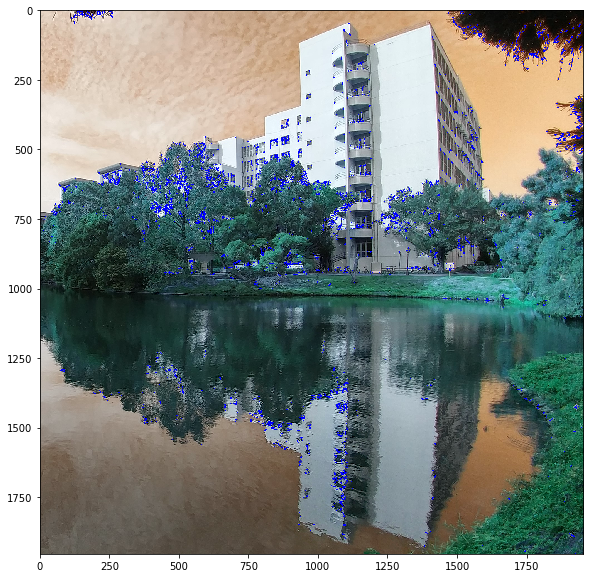

In [187]:
plt.figure(figsize=(20,10))
plt.imshow(imgCV2)

### Question B: 
#### Discuss the difference between 3x3 and 30x30 window sizes of structure tensor.
According to the figure above, the sensitivity of corner detection depends on the size of Window size. The larger the Window size, the lower the sensitivity of corner detection.

The Harris Corner Detector is just a mathematical way of determining which windows produce large variations when moved in any direction. With each window, a score R is associated. Based on this score, we can figure out which ones are corners and which ones are not.

If the window size is large, moving it around doesn't show much of variation. That is, the difference between the window and the original image is very low.

Of course, if the window size is very small, moving it around shows much of variation Even the little movement of the window produces a noticeable difference. The difference between the window and the original image is very high.

### Question C: 
#### Discuss the effect of non-maximal suppression.
The most important parameters of NMS is threshold. The larger the threshold is, the less confident proposals are less likely to be suppressed. This leads to larger number of false-positives and hence drop precision. Often times, the number of increased false-positives is larger than the increased true-positives because of the imbalanced ratio of the foreground and the background. Therefore, in my NMS, I use 10% as the threshold.

# B. Final results of rotating (by 30°) original images (**1 image**)

In [147]:
def rotate(image, angle, center = None, scale = 1.0):

    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

In [148]:
img_Gray_30 = rotate(img_Gray, 30)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

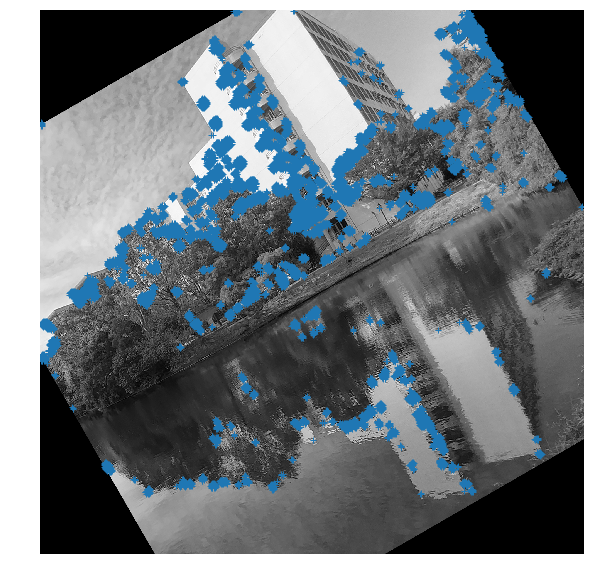

In [149]:
img_filtered_K10_R30 = convolve(img_Gray_30, gaussian_smooth(size=10,sigma=5))
gradient_magnitude_K10_R30, gradient_direction_K10_R30 = sobel_edge_detection(img_filtered_K10_R30)
harrisim_R30=structure_tensor(gradient_magnitude_K10_R30, gradient_direction_K10_R30, k=0.04)
where_are_nan = np.isnan(harrisim_R30)
harrisim_R30[where_are_nan] = 0
NMS_W3_R30=NMS(harrisim_R30,window_size=3)
plt.figure(figsize=(20,10))
plot_harris_points(img_Gray_30,NMS_W3_R30)

Text(0.5,1,'harrisim_R30')

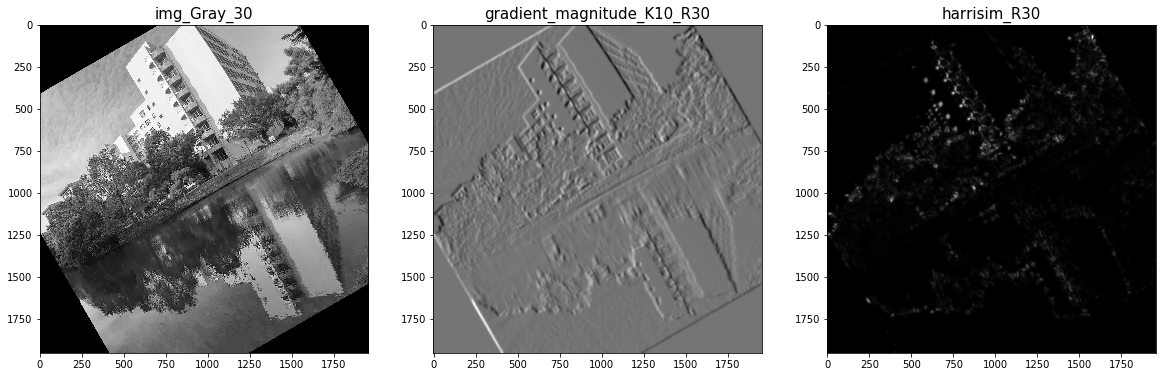

In [150]:
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img_Gray_30)
plt.title('img_Gray_30',fontsize=15)
plt.subplot(132),plt.imshow(gradient_magnitude_K10_R30)
plt.title('gradient_magnitude_K10_R30',fontsize=15)
plt.subplot(133),plt.imshow(harrisim_R30)
plt.title('harrisim_R30',fontsize=15)

In [158]:
img_Gray_30 = rotate(img_Gray, angle=30)
img_filtered_K10_R30 = convolve(img_Gray_30, gaussian_smooth(size=10,sigma=5))
img_filtered_K10_R30 =  img_filtered_K10_R30 / np.amax(img_filtered_K10_R30) * 255
gradient_magnitude_K10_R30, gradient_direction_K10_R30 = sobel_edge_detection(img_filtered_K10_R30)
gradient_magnitude_K10_R30 =  gradient_magnitude_K10_R30 / np.amax(gradient_magnitude_K10_R30) * 255
gradient_direction_K10_R30 =  gradient_direction_K10_R30 / np.amax(gradient_magnitude_K10_R30) * 255
harrisim_R30=structure_tensor(gradient_magnitude_K10_R30, gradient_direction_K10_R30, sigma)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


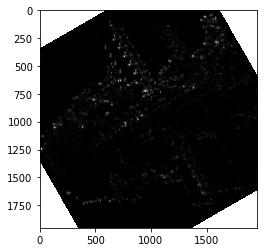

In [170]:
plt.imshow(harrisim_R30)

In [171]:
harrisim_R30

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

# C. Final results of scaling (to 0.5x) original images (**1 image**)

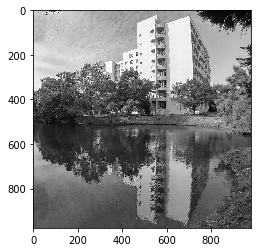

In [152]:
img_Gray_scaled = cv2.resize(img_Gray,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
plt.imshow(img_Gray_scaled)

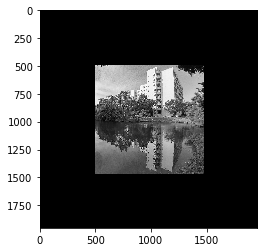

In [154]:
img_Gray_scaled_test = rotate(img_Gray, 0, scale=0.5)
plt.imshow(img_Gray_scaled_test)

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

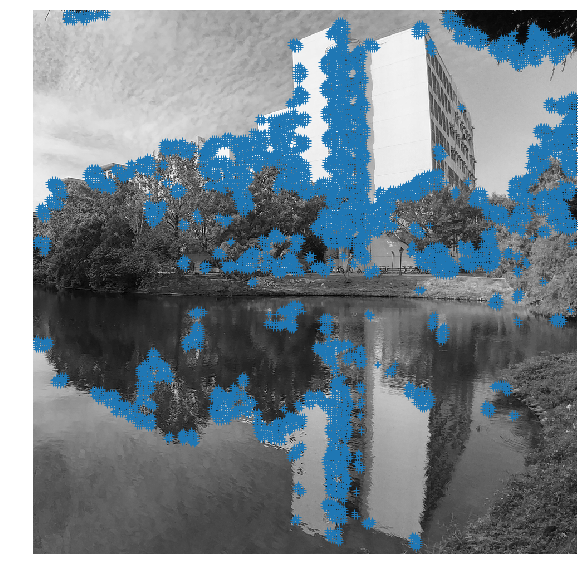

In [153]:
img_filtered_K10_scaled = convolve(img_Gray_scaled, gaussian_smooth(size=10,sigma=5))
gradient_magnitude_K10_scaled, gradient_direction_K10_scaled = sobel_edge_detection(img_filtered_K10_scaled)
harrisim_scaled=structure_tensor(gradient_magnitude_K10_scaled, gradient_direction_K10_scaled, k=0.04)
NMS_W3_scaled=NMS(harrisim_scaled,window_size=3)
plt.figure(figsize=(20,10))
plot_harris_points(img_Gray_scaled,NMS_W3_scaled)

<Figure size 1440x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

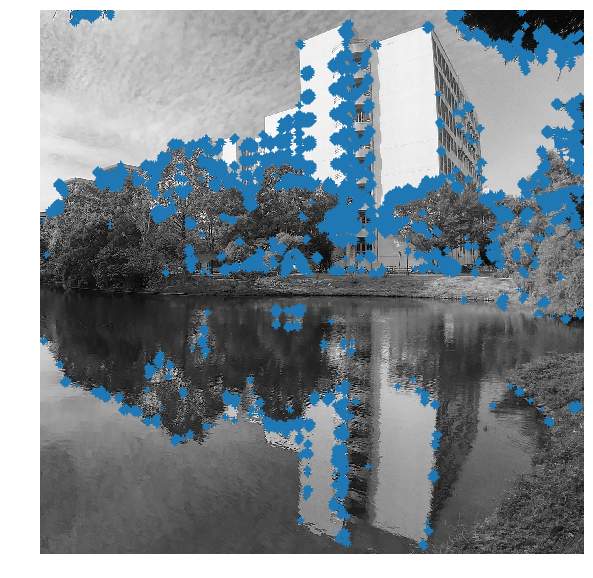

In [211]:
plt.figure(figsize=(20,10))
plot_harris_points(img_Gray,NMS_W3)

### Question D:
Discuss the results of rotated and scaled image. Is Harris detector rotation-invariant or scale-invariant? Explain the reason.

The Harris detector is rotation-invariant. Because the rotated image does not change the direction of the difference in brightness of each pixel on the image. The Harris Corner Detector is just a mathematical method that determines which window produces large variations when moved in any direction. Therefore,  the resulting of Harris corner detector by the rotated image will have the same result with non-rotated image.

But the Harris detector is not scale-invariant. Based on the Harris corner detector by the scaled image, we can see that the detected corners are more than the Harris corner detector without scaling. We can see that the scaled image is same as the structure tensor with large window size.
